# Predicting the Closing price of Major European Stock Exchange Indices for next one month

EuroStockMarket Dataset contains the daily closing prices of major European stock indices: Germany DAX (Ibis), Switzerland SMI, France CAC, and UK FTSE. The data are sampled in business time, i.e., weekends and holidays are omitted.
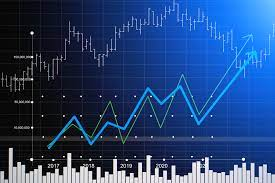                           

# Data gathering & understanding

 This is a Multivariate Time Series Problem with Dataset of 4 variables with 1860. The Object is of class 'mts'.
 
 
 4 Variables are DAX,CAC,SME,FTSE
 
 EuroStockmarket is an open surce dataset which is available online



# Time series introduction

## What is TimeSeries?

Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.


## Features

Regular Time Series - Specific Intervals between Observations

Irregular Time Series - No specific Intervals between observation

Univariate Time Series - Timestamp and single variable

Multivariate Time Series - Time Stamp and Multiple Variables






# Time series concepts

## Seasonality
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.Seasonality is always of a fixed and known period. Hence, seasonal time series are sometimes called periodic time series.

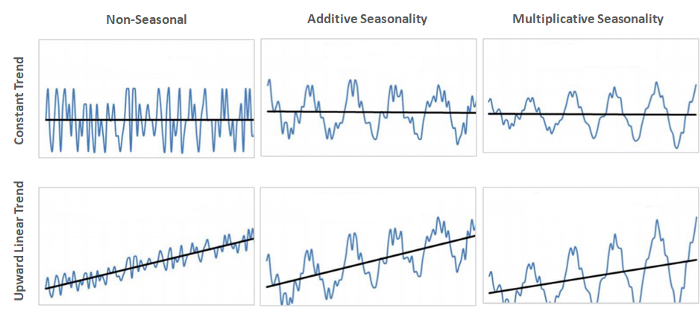


Additive model: yₜ = Level + Trend + Seasonality + Noise

Multiplicative model: yₜ = Level x Trend x Seasonality x Noise


## Level 
Level describes the average value of the series


## Trend
The linear increasing or decreasing behavior of the series over time.Trend is the change in the series between two adjacent periods, this is an optional component, not necessarily present in all series

## Cyclicity
A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years

## Noise
The random variation that can not be explained by the model, present in all series to some extent.

## Stationarity

Stationary Time Series - A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.


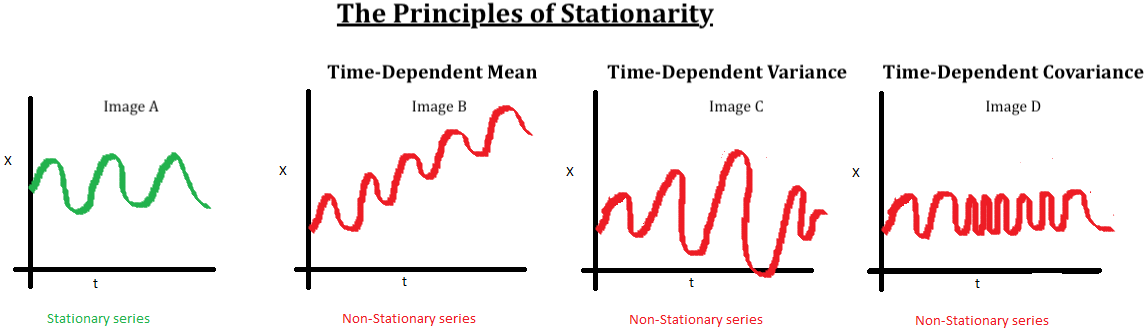

      



# Algorithms used to Solve this problem


1. Holt Winters 
2. Arima
3. VAR Modeling
4. Neural Network



# Import Libraries

In [1]:
library(vars)
library(MTS)
library(tseries)
library(FitAR)
library(forecast)
library(neuralnet)
library(MASS)
library(grid)
library(ggplot2)
library(reshape2)

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Warning message:
"package 'MTS' was built under R version 3.6.3"
Attaching package: 'MTS'

The following object is masked from 'package:vars':

    VAR

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  me

# EDA


Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [2]:
#Peek into the data
head(EuStockMarkets)
# Review the summary statistics
summary(EuStockMarkets)
#Missing Value check
sum(is.na(EuStockMarkets))
#Frequency Check
frequency(EuStockMarkets)


,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8


      DAX            SMI            CAC            FTSE     
 Min.   :1402   Min.   :1587   Min.   :1611   Min.   :2281  
 1st Qu.:1744   1st Qu.:2166   1st Qu.:1875   1st Qu.:2843  
 Median :2141   Median :2796   Median :1992   Median :3247  
 Mean   :2531   Mean   :3376   Mean   :2228   Mean   :3566  
 3rd Qu.:2722   3rd Qu.:3812   3rd Qu.:2274   3rd Qu.:3994  
 Max.   :6186   Max.   :8412   Max.   :4388   Max.   :6179  

[1] 0

[1] 260

# Visualizing the Data

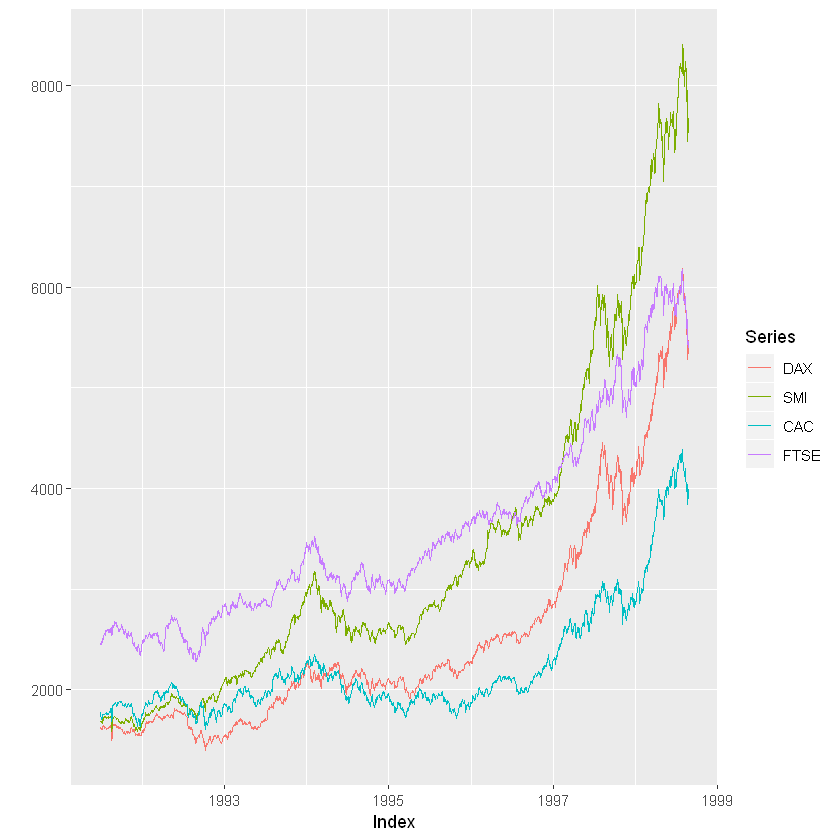

In [3]:
library(zoo)
library(ggplot2)
zooMarkets <- as.zoo(EuStockMarkets)
#autoplot(zooMarkets) # plot with facets
autoplot(zooMarkets, facet = NULL) # plot without facets

# Decomposing Time Series

Time Series is decomposed to estimate trends,seasonality and random components in the dataset

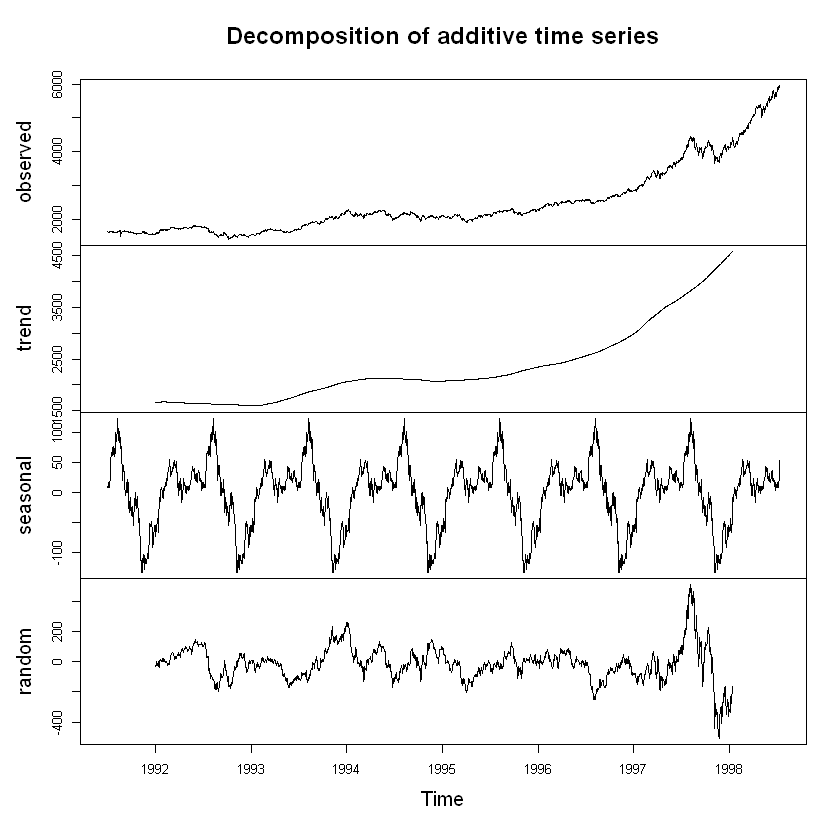

In [4]:
#Decomposition Approach3- Default for this finction is additive
DAX=(head(EuStockMarkets,1830)[,1])
test = tail(EuStockMarkets,30)[,1]
components.ts = decompose(DAX)
plot(components.ts)

In [5]:
#Additive Decompose for DAX indice
decompose(DAX,type = 'additive')
#Multiplicative Decompose for DAX indice
decompose(DAX,type = 'multiplicative')

$x
Time Series:
Start = c(1991, 130) 
End = c(1998, 139) 
Frequency = 260 
   [1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
  [10] 1645.89 1647.84 1638.35 1629.93 1621.49 1624.74 1627.63 1631.99 1621.18
  [19] 1613.42 1604.95 1605.75 1616.67 1619.29 1620.49 1619.67 1623.07 1613.98
  [28] 1631.87 1630.37 1633.47 1626.55 1650.43 1650.06 1654.11 1653.60 1501.82
  [37] 1524.28 1603.65 1622.49 1636.68 1652.10 1645.81 1650.36 1651.55 1649.88
  [46] 1653.52 1657.51 1649.55 1649.09 1646.41 1638.65 1625.80 1628.64 1632.22
  [55] 1633.65 1631.17 1635.80 1621.27 1624.70 1616.13 1618.12 1627.80 1625.79
  [64] 1614.80 1612.80 1605.47 1609.32 1607.48 1607.48 1604.89 1589.12 1582.27
  [73] 1567.99 1568.16 1569.71 1571.74 1585.41 1570.01 1561.89 1565.18 1570.34
  [82] 1577.00 1590.29 1572.72 1572.07 1579.19 1588.73 1586.01 1579.77 1572.58
  [91] 1568.09 1578.21 1573.94 1582.06 1610.18 1605.16 1623.84 1615.26 1627.08
 [100] 1626.97 1605.70 1589.70 1589.70 1603.26 1599.75 1

$x
Time Series:
Start = c(1991, 130) 
End = c(1998, 139) 
Frequency = 260 
   [1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
  [10] 1645.89 1647.84 1638.35 1629.93 1621.49 1624.74 1627.63 1631.99 1621.18
  [19] 1613.42 1604.95 1605.75 1616.67 1619.29 1620.49 1619.67 1623.07 1613.98
  [28] 1631.87 1630.37 1633.47 1626.55 1650.43 1650.06 1654.11 1653.60 1501.82
  [37] 1524.28 1603.65 1622.49 1636.68 1652.10 1645.81 1650.36 1651.55 1649.88
  [46] 1653.52 1657.51 1649.55 1649.09 1646.41 1638.65 1625.80 1628.64 1632.22
  [55] 1633.65 1631.17 1635.80 1621.27 1624.70 1616.13 1618.12 1627.80 1625.79
  [64] 1614.80 1612.80 1605.47 1609.32 1607.48 1607.48 1604.89 1589.12 1582.27
  [73] 1567.99 1568.16 1569.71 1571.74 1585.41 1570.01 1561.89 1565.18 1570.34
  [82] 1577.00 1590.29 1572.72 1572.07 1579.19 1588.73 1586.01 1579.77 1572.58
  [91] 1568.09 1578.21 1573.94 1582.06 1610.18 1605.16 1623.84 1615.26 1627.08
 [100] 1626.97 1605.70 1589.70 1589.70 1603.26 1599.75 1

In [6]:
#Decomposition Approach 2
#Multiplicative Decompose for DAX indice
stl(DAX,s.window='periodic')

 Call:
 stl(x = DAX, s.window = "periodic")

Components
Time Series:
Start = c(1991, 130) 
End = c(1998, 139) 
Frequency = 260 
            seasonal    trend     remainder
1991.496   43.014950 1622.566 -3.683062e+01
1991.500   55.360648 1622.876 -6.460701e+01
1991.504   61.428847 1623.187 -7.810590e+01
1991.508   68.740795 1623.498 -7.119854e+01
1991.512   68.902744 1623.808 -7.455118e+01
1991.515   71.445942 1624.119 -8.495506e+01
1991.519   66.621641 1624.430 -6.030145e+01
1991.523   81.274839 1624.741 -6.584534e+01
1991.527   98.174288 1625.051 -8.775548e+01
1991.531  108.988736 1625.362 -8.846062e+01
1991.535   40.985770 1625.673 -1.881834e+01
1991.538   40.567895 1625.983 -2.820116e+01
1991.542   41.120021 1626.294 -3.748398e+01
1991.546   33.097860 1626.605 -3.821251e+01
1991.550   43.607128 1626.915 -4.578246e+01
1991.554   46.776396 1627.226 -4.637242e+01
1991.558   36.017092 1627.537 -3.156381e+01
1991.562   45.093503 1627.847 -5.176091e+01
1991.565   38.798486 1628.158 -5.353

# Data Stationary Test

### ADF test: 
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series

In [7]:
#Testing for Stationarity by applying Augmented Dicker-Fuller Test on all column values of datset

#stationary  means, having constant mean and variance over time
apply(EuStockMarkets, 2, adf.test)

#since the p-value of the ADF test is greater than 0.05, we fail to reject the null hypothesis
# hence the time series is not stationary


Warning message in FUN(newX[, i], ...):
"p-value greater than printed p-value"

$DAX

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -0.82073, Lag order = 12, p-value = 0.9598
alternative hypothesis: stationary


$SMI

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -0.522, Lag order = 12, p-value = 0.9808
alternative hypothesis: stationary


$CAC

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -0.24897, Lag order = 12, p-value = 0.99
alternative hypothesis: stationary


$FTSE

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -1.9736, Lag order = 12, p-value = 0.5895
alternative hypothesis: stationary



# Differencing

Differencing is a type of transformation that accomplishes several things:

Making a time series stationary.
Stabilizing the mean of the time series.


There are different ways to make a time process stationary. One of these is simply taking its first difference, once subtracted the seasonal component

In [8]:
#Approach 1
stnry = diffM(EuStockMarkets)

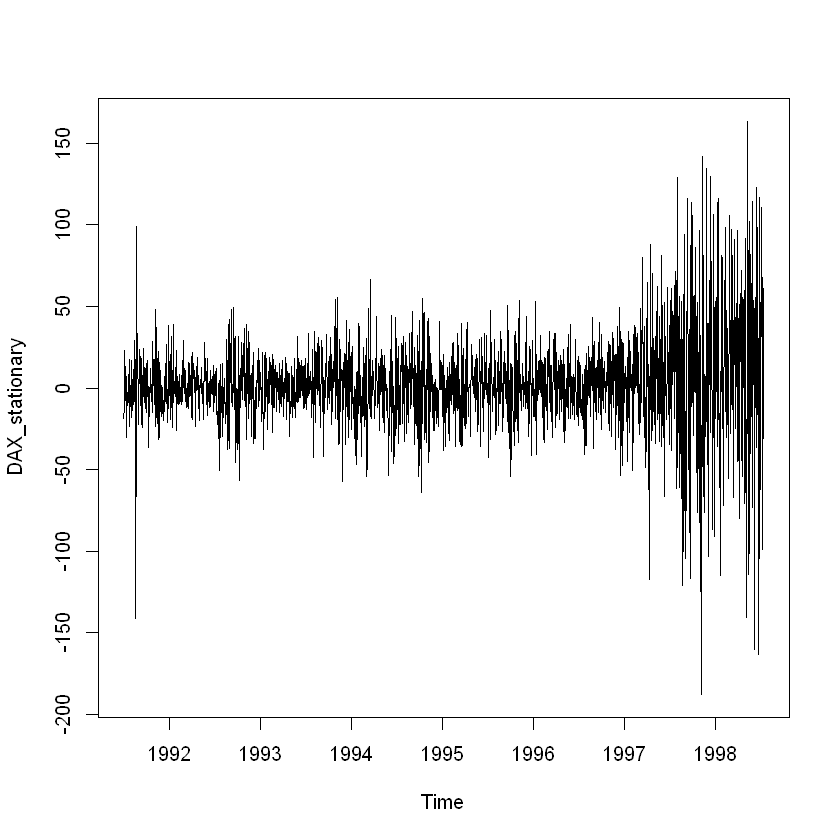

In [9]:
#Approach 2
x = DAX- components.ts$seasonal
DAX_stationary <- diff(x, differences=1)
plot(DAX_stationary)

It now looks more stationary. Well, these interventions we made -getting rid of seasonality and taking the first difference- can be implemented directly into the model

 # Model Fitting 

## ARIMA


ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.


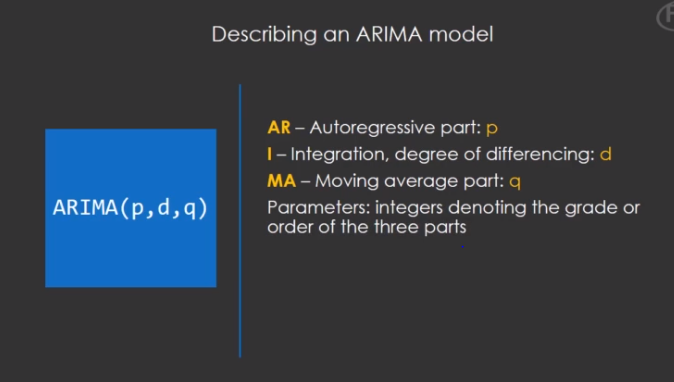

# ACF/PACF Test

Before training the model need to decide the number of parameters p,q and, in this specific case, d (order of difference we have to take to make our series stationary). A good way to proceed is inspecting the Autocorrelation Function and Partial Autocorrelation Function of our series:

These functions tell us whether time series values exhibit some kind of correlations with their past values and, if yes, up to which time lag. These serial correlations can be computed taking into account all the correlations among values between t and t-n (ACF) or considering only the correlation between values at t and t-n (PACF)

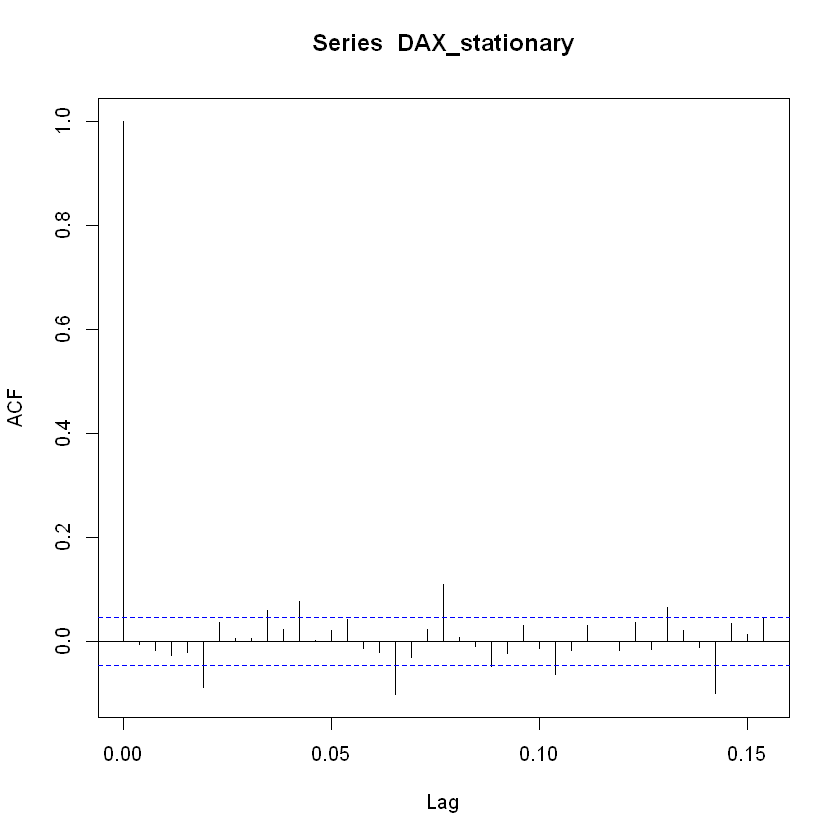

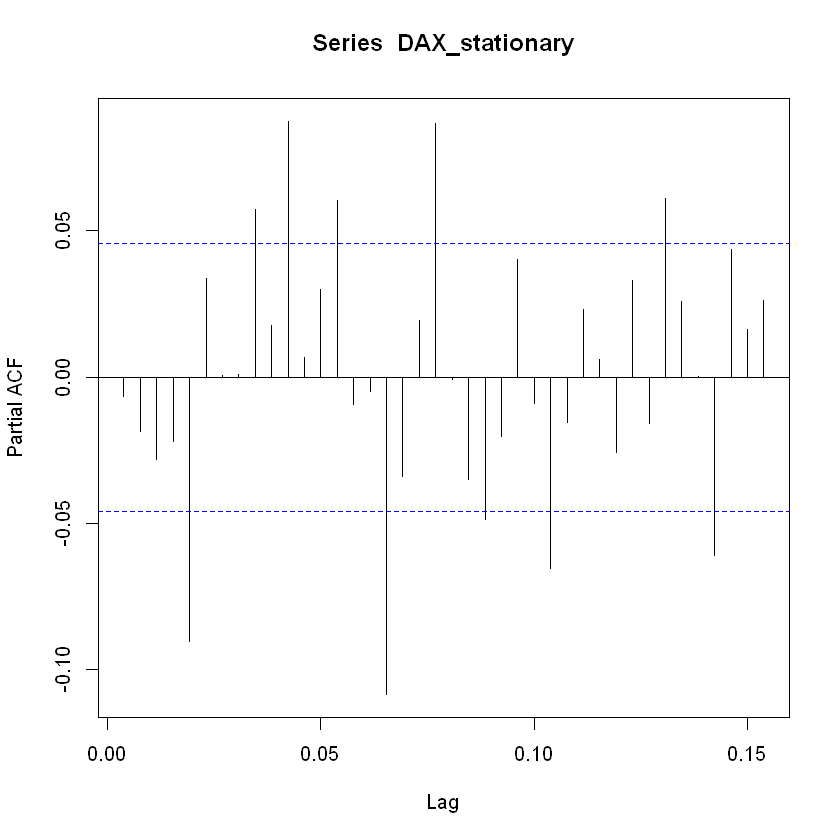

In [10]:
#To find the Correlation using Autocorrelation Function and Partial Autocorrelation Function of our series
acf(DAX_stationary,lag.max = 40)
pacf(DAX_stationary,lag.max = 40)

## Interpreting the Results

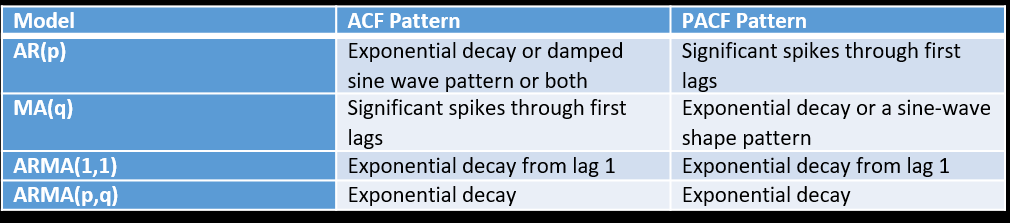

In [11]:
fitARIMA = arima(DAX, order=c(1,1,1),seasonal = list(order = c(1,0,0), period = 12),method="ML")

# Examining Residuals

It is fundamental, for the model to be accurate enough, that residuals are stationary, without a specific trend. Indeed, if there was a trend, it would mean there is still a pattern the model didn't capture, there is some available information that has not been used. If residuals are not stationary, hence our model needs more (or a different combination of) parameters

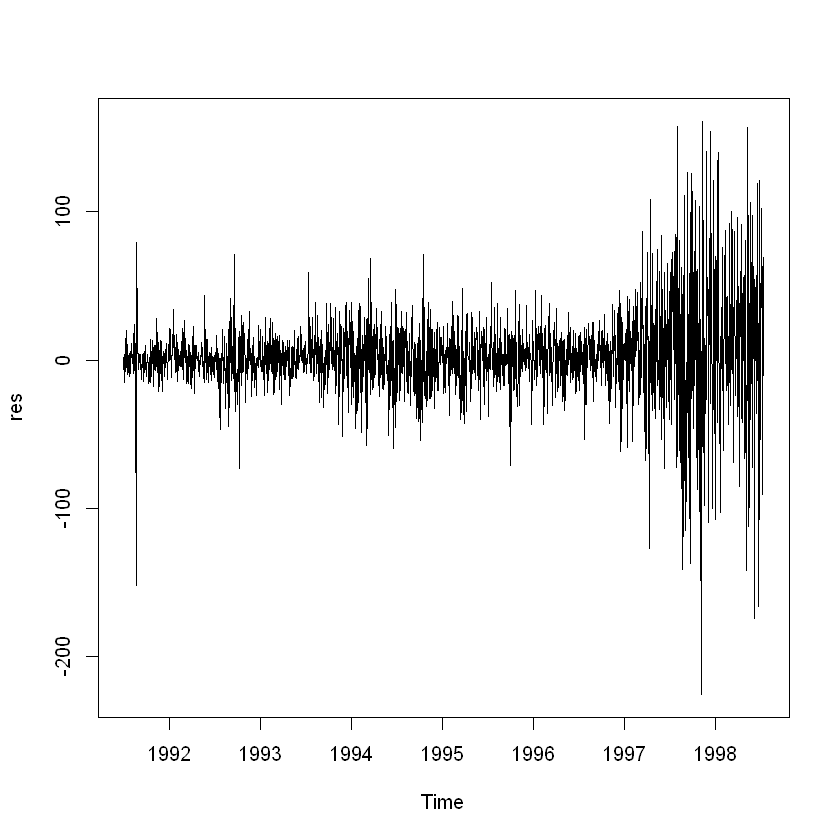

In [12]:
res=fitARIMA$residuals
plot(res)

# They look pretty stationary, but we need to test it. We will do Ljung Box Test

### Ljung Box Hypothesis


H0: The data are independently distributed

H1: The data are not independently distributed (hence, they exhibit serial correlation)

In [13]:
Box.test(res,type="Ljung-Box")


	Box-Ljung test

data:  res
X-squared = 0.05744, df = 1, p-value = 0.8106


p-value excludes the possibility of serial correlations, as it is greater than any significant level of alpha

## Examining best model using  auto.arima()

In [14]:
auto.arima(DAX, trace=TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,2,2)(1,0,1)[260]                    : Inf
 ARIMA(0,2,0)                                : 19025.24
 ARIMA(1,2,0)(1,0,0)[260]                    : Inf
 ARIMA(0,2,1)(0,0,1)[260]                    : Inf
 ARIMA(0,2,0)(1,0,0)[260]                    : Inf
 ARIMA(0,2,0)(0,0,1)[260]                    : Inf
 ARIMA(0,2,0)(1,0,1)[260]                    : Inf
 ARIMA(1,2,0)                                : 18531.7
 ARIMA(1,2,0)(0,0,1)[260]                    : Inf
 ARIMA(1,2,0)(1,0,1)[260]                    : Inf
 ARIMA(2,2,0)                                : 18328.94
 ARIMA(2,2,0)(1,0,0)[260]                    : Inf
 ARIMA(2,2,0)(0,0,1)[260]                    : Inf
 ARIMA(2,2,0)(1,0,1)[260]                    : Inf
 ARIMA(3,2,0)                                : 18207.66
 ARIMA(3,2,0)(1,0,0)[260]                    : Inf
 ARIMA(3,2,0)(0,0,1)[260]                    : Inf
 ARIMA(3,2,0)(1,0,1)[260]                    : Inf
 A

Series: DAX 
ARIMA(5,2,0) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.8091  -0.6577  -0.5078  -0.3404  -0.2352
s.e.   0.0228   0.0285   0.0302   0.0285   0.0228

sigma^2 estimated as 1147:  log likelihood=-9031.23
AIC=18074.46   AICc=18074.51   BIC=18107.53

 Baesed on above results most accurate model is an ARIMA(5,2,0)

In [15]:
arimamodel <- arima(DAX,order=c(5,2,0))

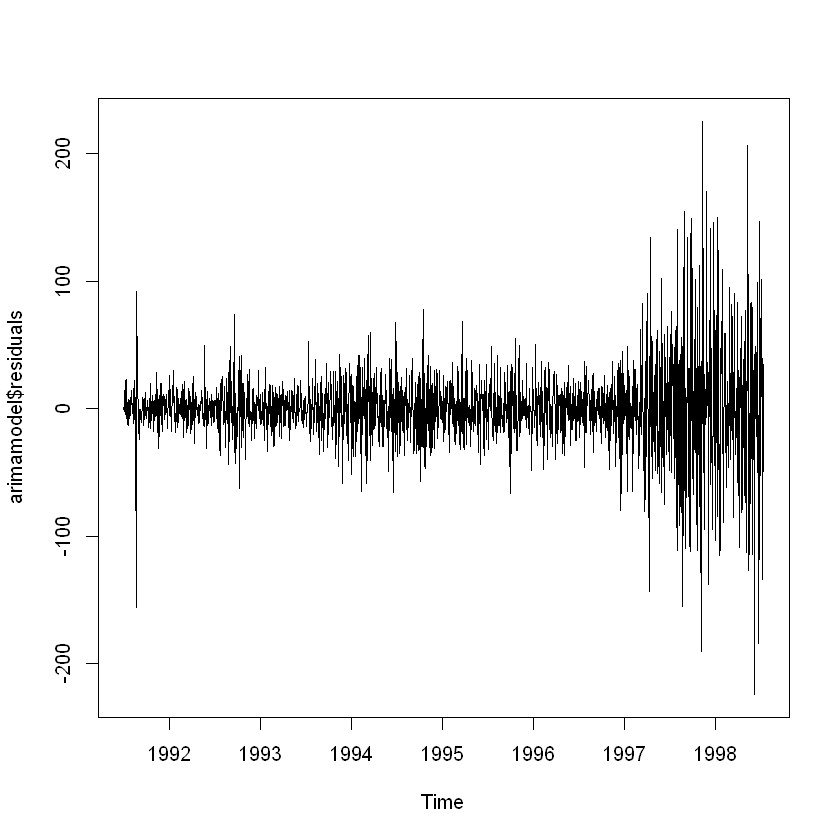

In [16]:
#Visualizing the residuals
plot(arimamodel$residuals)

In [17]:
#Performing Ljung Box  test
Box.test(arimamodel$residuals,type="Ljung-Box")


	Box-Ljung test

data:  arimamodel$residuals
X-squared = 2.2003, df = 1, p-value = 0.138


### ARIMA Train Forecast Plot

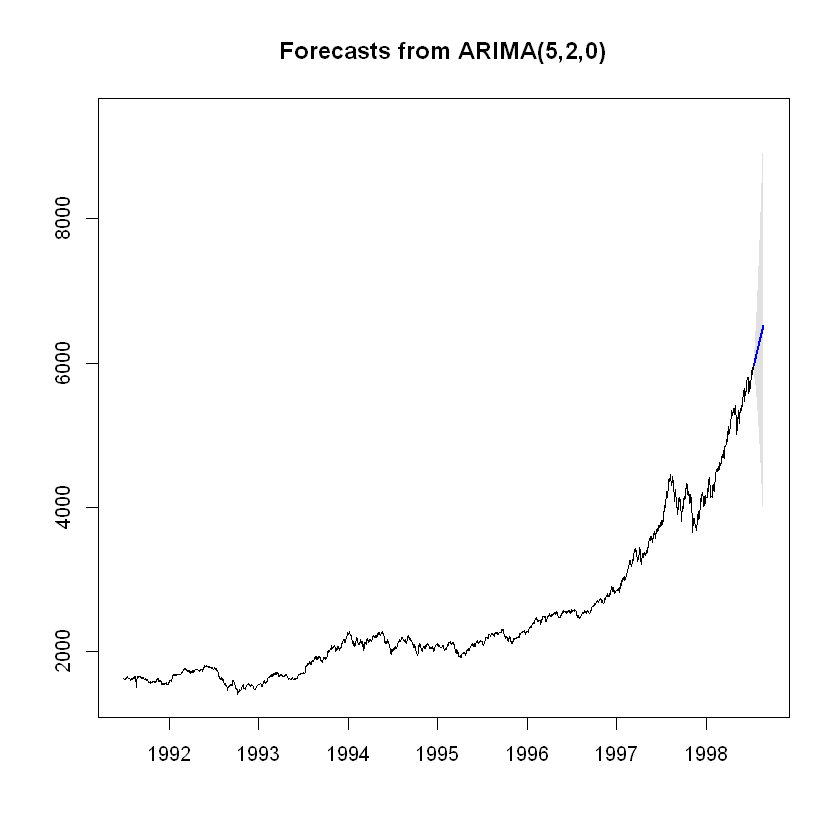

In [18]:
predicted_values = forecast(arimamodel,h=30, level=c(99.5))
plot(predicted_values)

### ARIMA Train Test Forecast Plot

Warning message:
"attributes are not identical across measure variables; they will be dropped"

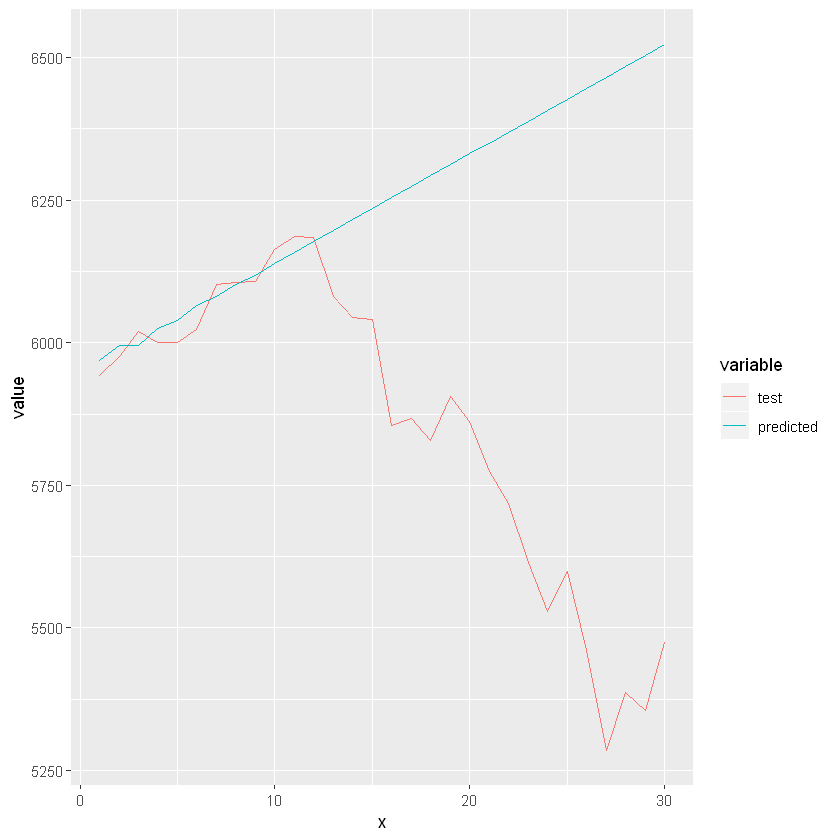

In [19]:
predicted_values = forecast(arimamodel,h=30, level=c(99.5))
df_arima = as.data.frame(predicted_values)
arima = df_arima$`Point Forecast`

data = as.data.frame(test)
data$arima = arima
colnames(data) = c("test","predicted")
data$x = 1:30

data.melted <- melt(data, id="x")
qplot(x=x, y=value, color=variable, data=data.melted, geom="line")

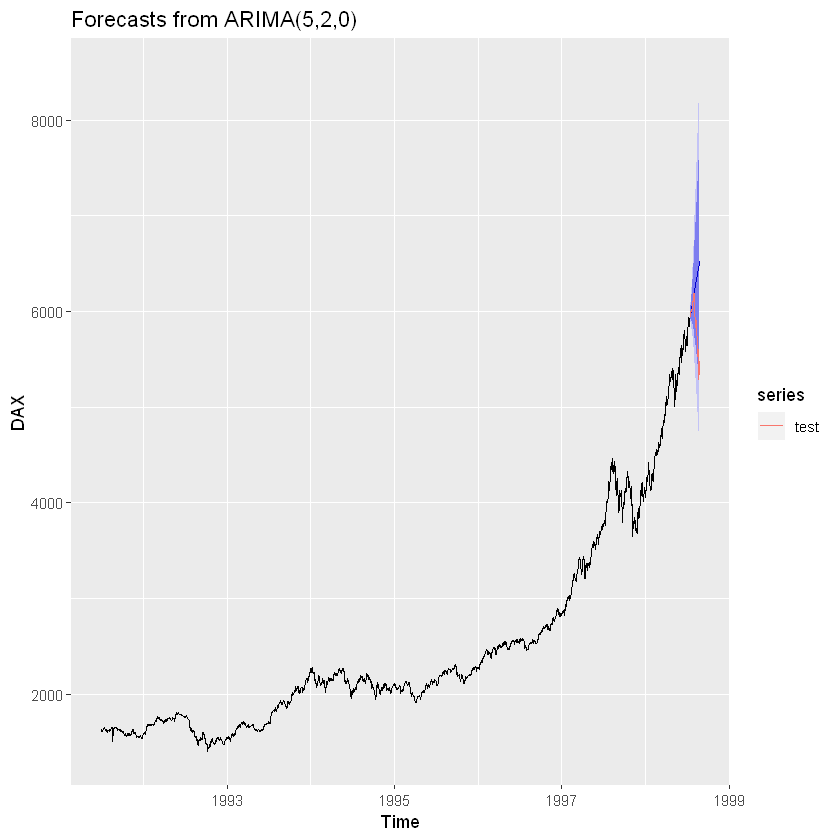

In [20]:
arimamodel %>%
  forecast(h=30) %>%
  autoplot() + autolayer(test)

Train Metrics

In [21]:
accuracy(predicted_values)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0542637,33.80866,21.6247,0.001311638,0.8141022,0.04083831,-0.03464635


Test Metrics

In [22]:
predicted_values = forecast(arimamodel,h=30, level=c(99.5))
df_arima = as.data.frame(predicted_values)
arima = df_arima$`Point Forecast`

library(Metrics)
print(paste0("RMSE: ", rmse(test, arima)))
print(paste0("MAPE: ", mape(test, arima)))

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following object is masked from 'package:forecast':

    accuracy



[1] "RMSE: 571.969915900105"
[1] "MAPE: 0.0720517388265722"


# Holt winters explained

Holt-Winters is a model of time series behavior. Forecasting always requires a model, and Holt-Winters is a way to model three aspects of the time series: a typical value (average), a slope (trend) over time, and a cyclical repeating pattern (seasonality). Holt-Winters uses exponential smoothing to encode lots of values from the past and use them to predict “typical” values for the present and future.


# Building Model

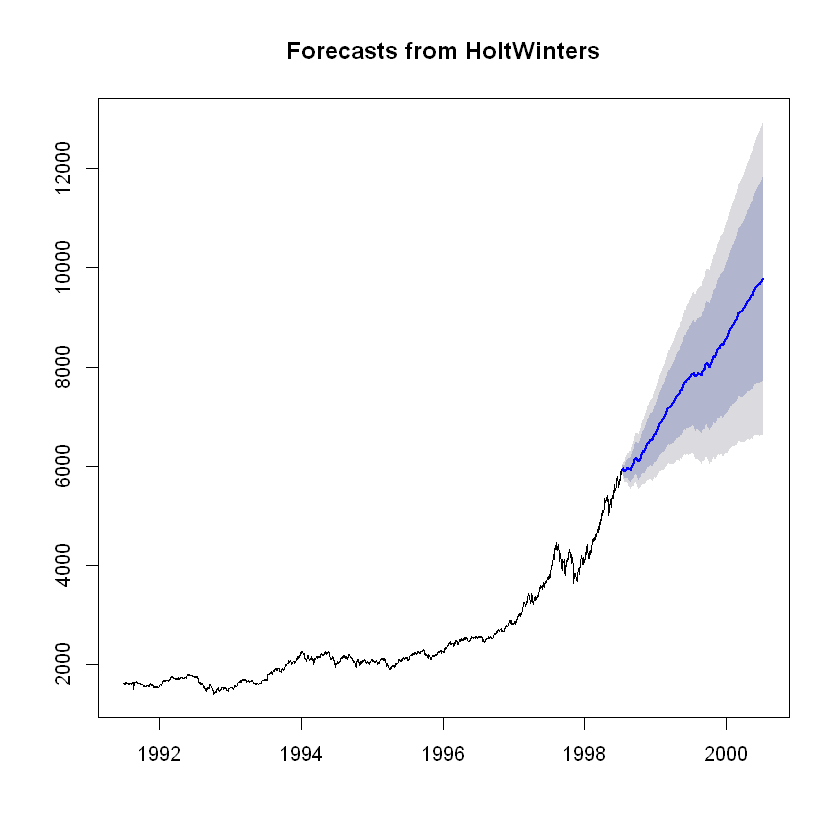

In [10]:
#simple exponential smoothing for default ts assuming no trend
#DAX_notrend <- HoltWinters(DAX, beta=NULL, gamma=FALSE)
#plot(forecast(DAX_notrend))

holtwintermodel1<-HoltWinters(DAX,beta=NULL,gamma=NULL)
plot(forecast(holtwintermodel1))

In [11]:
pred <- as.data.frame(forecast(holtwintermodel1))

In [12]:
#MAPE metric to see the accuracy of time series model
holtwintermodel1$SSE


[1] 1955983

### Holt winters Train Forecast Plot

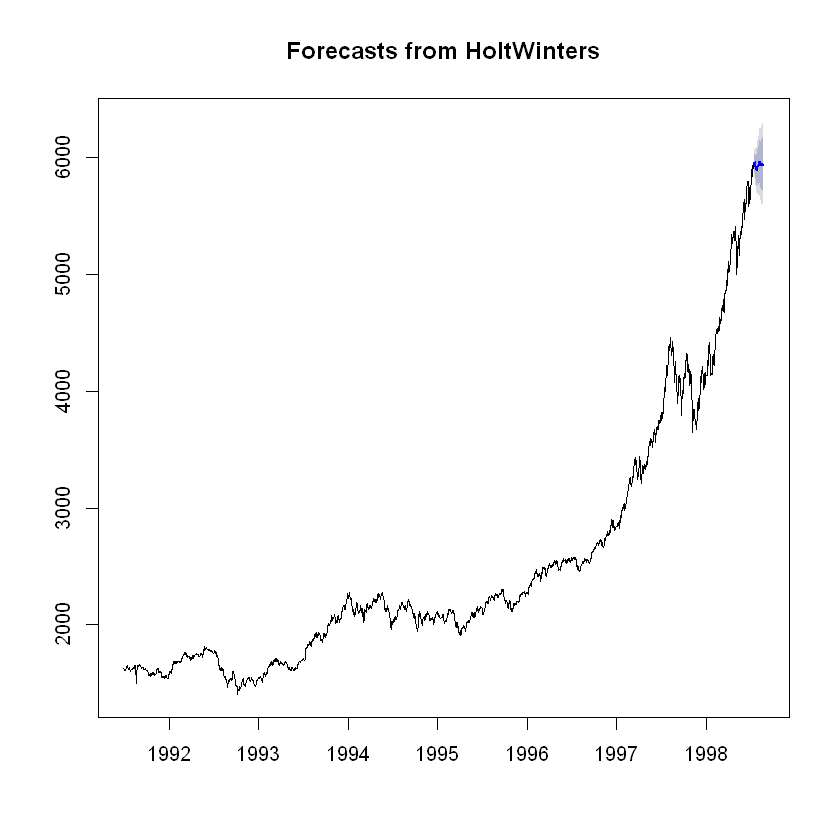

In [13]:
#Next 30 predictions considering model1
predicted_values1 = forecast(holtwintermodel1,h=30)
plot(predicted_values1)


### Holt winters Train Test Forecast Plot

Warning message:
"attributes are not identical across measure variables; they will be dropped"

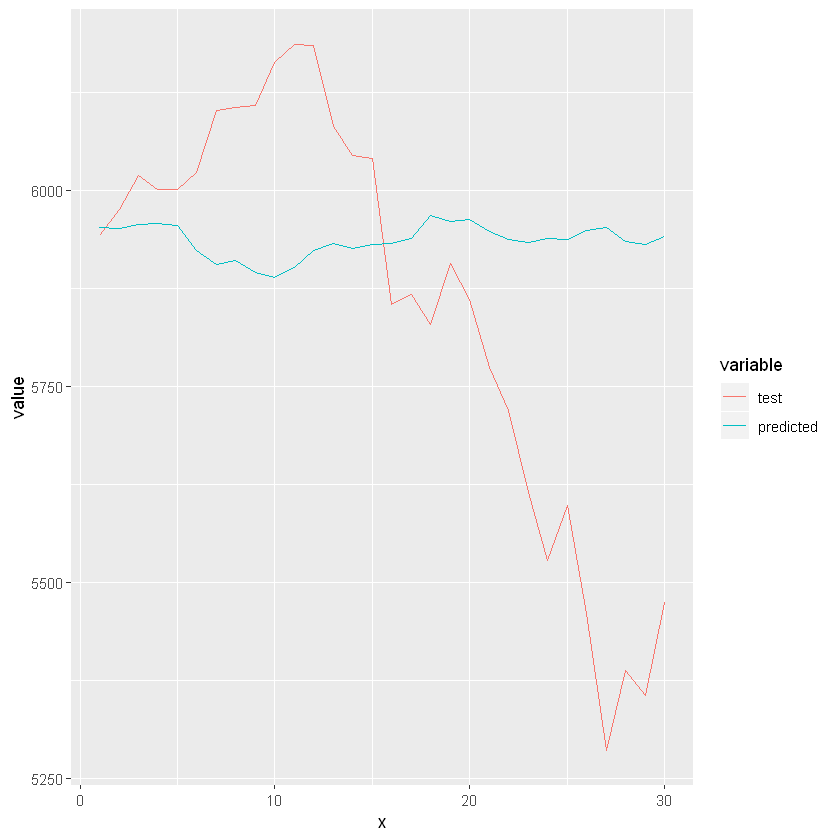

In [14]:
predicted_values = forecast(holtwintermodel1,h=30)
df_op = as.data.frame(predicted_values)
hw = df_op$`Point Forecast`


data = as.data.frame(test)
data$arima = hw

colnames(data) = c("test","predicted")

data$x = 1:30
data.melted <- melt(data, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=data.melted, geom="line")

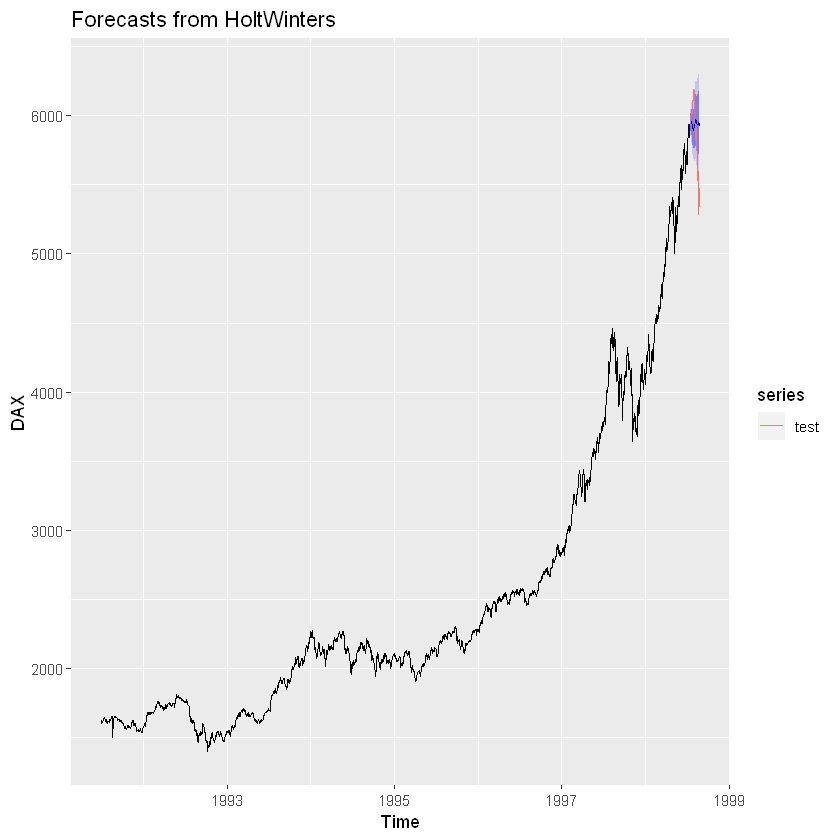

In [15]:
holtwintermodel1 %>%
  forecast(h=30) %>%
  autoplot() + autolayer(test)

Train Metrics

In [16]:
accuracy(predicted_values1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.259542,35.29659,23.11913,0.03376286,0.8277449,0.04366055,0.07838734


Test Metrics

In [17]:
predicted_values = forecast(holtwintermodel1,h=30)
df_op = as.data.frame(predicted_values)
hw = df_op$`Point Forecast`

library(Metrics)
print(paste0("RMSE: ", rmse(test, hw)))
print(paste0("MAPE: ", mape(test, hw)))

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following object is masked from 'package:forecast':

    accuracy



[1] "RMSE: 285.829445161084"
[1] "MAPE: 0.039571246587323"


# Neural Network

In [10]:
neuralnetworkmodel <- nnetar(EuStockMarkets[,1],pepeats = 1=20,size=10,r0,lambda = 0)

In [11]:
predictedvalue <- forecast(neuralnetworkmodel,30)

### Neural Network Train Forecast Plot

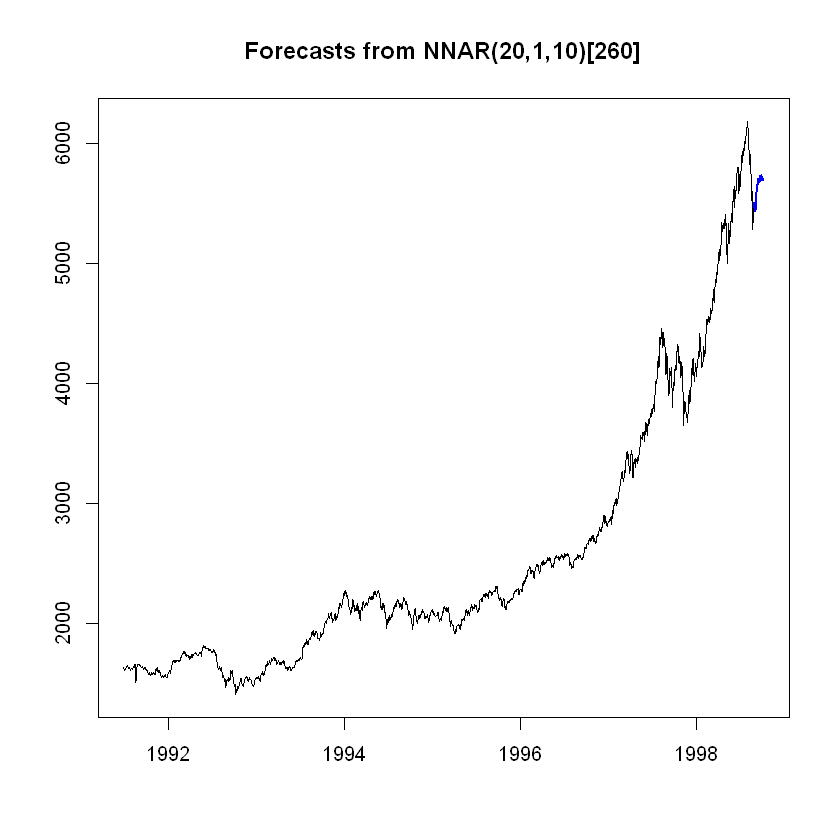

In [12]:
plot(predictedvalue)

### Neural Network Train Test Forecast Plot

Warning message:
"attributes are not identical across measure variables; they will be dropped"

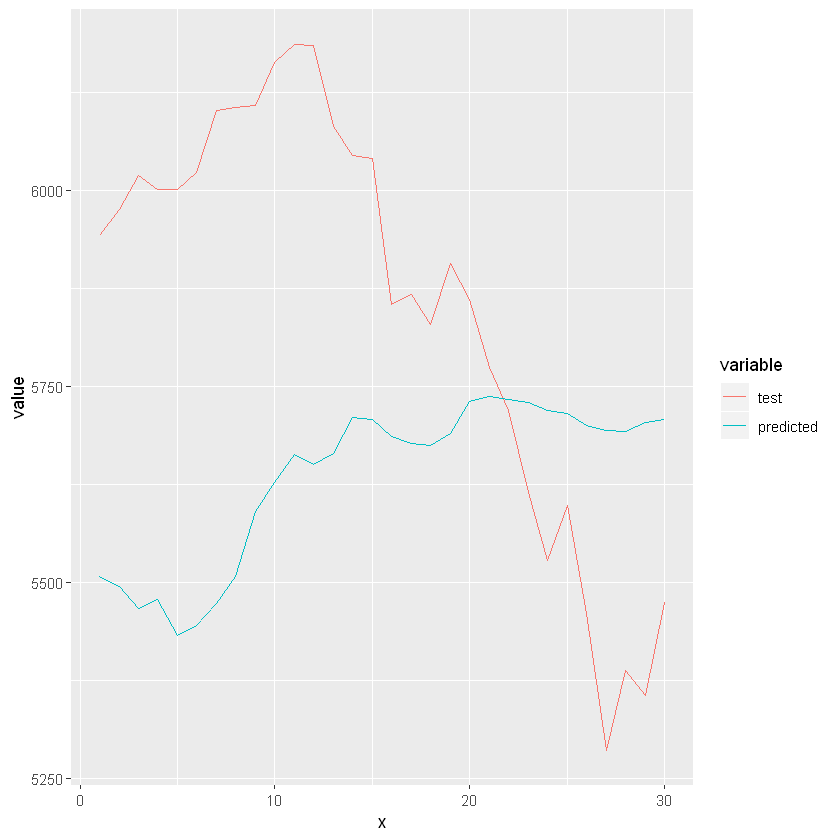

In [13]:
predicted_values = forecast(neuralnetworkmodel,h=30)
df_op = as.data.frame(predicted_values)
nn = df_op$`Point Forecast`


data = as.data.frame(test)
data$arima = nn

colnames(data) = c("test","predicted")

data$x = 1:30
data.melted <- melt(data, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=data.melted, geom="line")

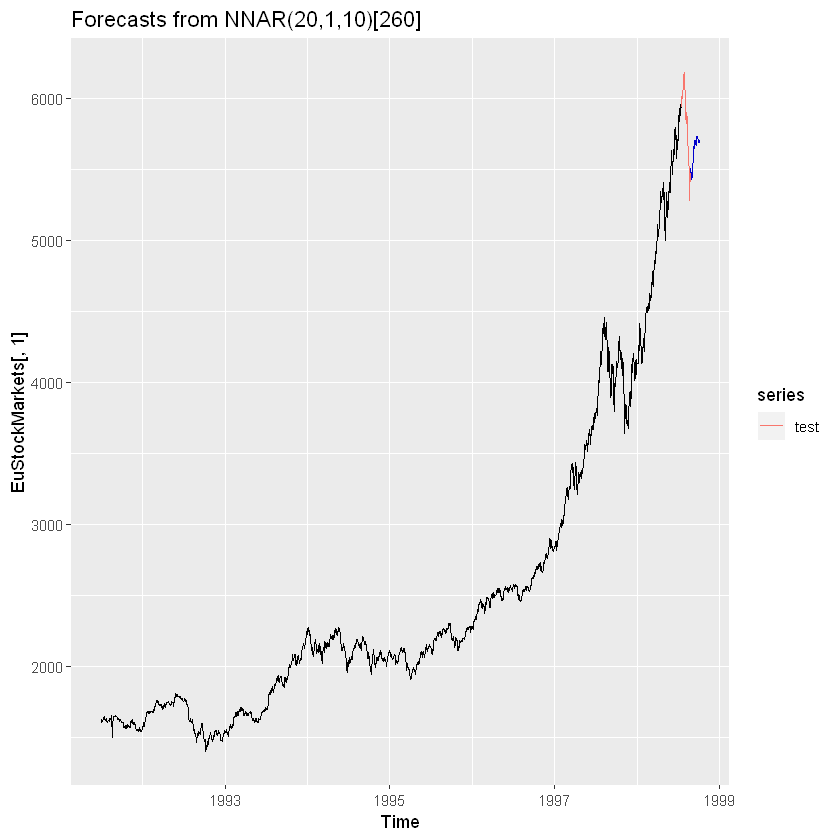

In [14]:
neuralnetworkmodel %>%
  forecast(h=30) %>%
  autoplot() + autolayer(test)

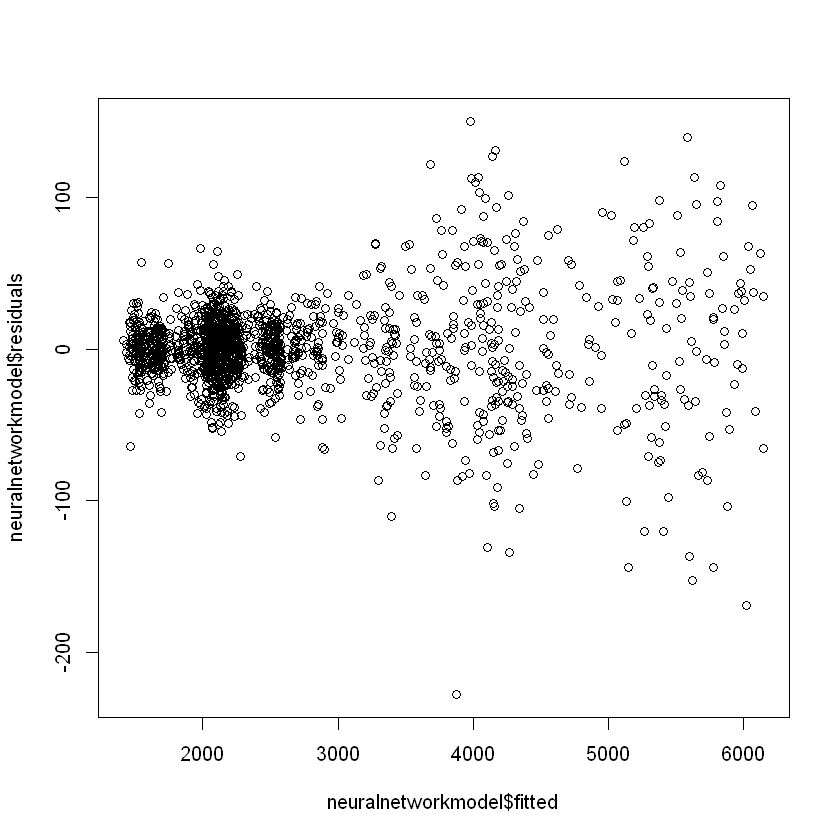

In [15]:
plot(neuralnetworkmodel$fitted,neuralnetworkmodel$residuals)

Train Metrics

In [16]:
accuracy(predictedvalue)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2589477,31.42287,20.76088,-0.0007314342,0.730194,0.03777341,-0.005632607


Test Metrics

In [17]:
predicted_values = forecast(neuralnetworkmodel,h=30)
df_op = as.data.frame(predicted_values)
nn = df_op$`Point Forecast`

library(Metrics)
print(paste0("RMSE: ", rmse(test, nn)))
print(paste0("MAPE: ", mape(test, nn)))

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following object is masked from 'package:forecast':

    accuracy



[1] "RMSE: 392.884648702494"
[1] "MAPE: 0.0587629124106748"


# VAR MODEL

VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

In [10]:
# Let us do the stationary test once on the Dataset - Note that we have already made the data stationary
apply(stnry, 2, adf.test)
#as the P Value is less then 0.05 we can use this series


Warning message in FUN(newX[, i], ...):
"p-value smaller than printed p-value"Warning message in FUN(newX[, i], ...):
"p-value smaller than printed p-value"Warning message in FUN(newX[, i], ...):
"p-value smaller than printed p-value"Warning message in FUN(newX[, i], ...):
"p-value smaller than printed p-value"

$DAX

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -9.9997, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


$SMI

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -10.769, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


$CAC

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -11.447, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


$FTSE

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -10.838, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



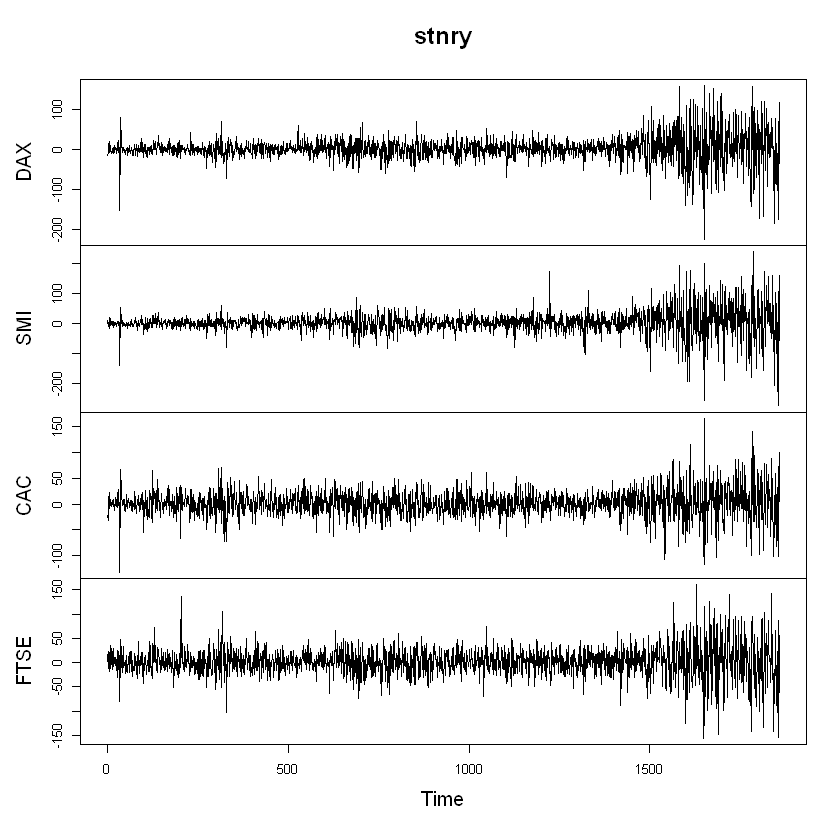

In [11]:
## VAR modeling

plot.ts(stnry)

In [12]:
#Lag order identification
library(vars)
VARselect(stnry, type='none', lag.max =10)
#Based on the output chosing the AIC

,1,2,3,4,5,6,7,8,9,10
AIC(n),2.527062e+01,2.527564e+01,2.526566e+01,2.525844e+01,2.525725e+01,2.525408e+01,2.525692e+01,2.525696e+01,2.525073e+01,2.525455e+01
HQ(n),2.528823e+01,2.531088e+01,2.531850e+01,2.532891e+01,2.534534e+01,2.535978e+01,2.538023e+01,2.539789e+01,2.540927e+01,2.543071e+01
SC(n),2.531840e+01,2.537122e+01,2.540902e+01,2.544959e+01,2.549619e+01,2.554080e+01,2.559143e+01,2.563926e+01,2.568081e+01,2.573242e+01
FPE(n),9.438206e+10,9.485771e+10,9.391500e+10,9.324010e+10,9.312964e+10,9.283467e+10,9.309877e+10,9.310329e+10,9.252533e+10,9.288047e+10


In [13]:
#Creating a VAR model with vars
var.a <- vars::VAR(stnry,
                  lag.max=10,
                   ic = "AIC",
                   type = "none")


In [14]:
summary(var.a)


VAR Estimation Results:
Endogenous variables: DAX, SMI, CAC, FTSE 
Deterministic variables: none 
Sample size: 1850 
Log Likelihood: -33712.408 
Roots of the characteristic polynomial:
0.817 0.817 0.8116 0.8116 0.7915 0.7915 0.7864 0.7864 0.7784 0.7784 0.7579 0.7579 0.7541 0.7541 0.7537 0.7537 0.7473 0.7421 0.7421 0.7295 0.7295 0.7285 0.7153 0.7153 0.6723 0.6723 0.6696 0.6696 0.6616 0.6616 0.6551 0.577 0.577 0.4544 0.289 0.1213
Call:
vars::VAR(y = stnry, type = "none", lag.max = 10, ic = "AIC")


Estimation results for equation DAX: 
DAX = DAX.l1 + SMI.l1 + CAC.l1 + FTSE.l1 + DAX.l2 + SMI.l2 + CAC.l2 + FTSE.l2 + DAX.l3 + SMI.l3 + CAC.l3 + FTSE.l3 + DAX.l4 + SMI.l4 + CAC.l4 + FTSE.l4 + DAX.l5 + SMI.l5 + CAC.l5 + FTSE.l5 + DAX.l6 + SMI.l6 + CAC.l6 + FTSE.l6 + DAX.l7 + SMI.l7 + CAC.l7 + FTSE.l7 + DAX.l8 + SMI.l8 + CAC.l8 + FTSE.l8 + DAX.l9 + SMI.l9 + CAC.l9 + FTSE.l9 

          Estimate Std. Error t value Pr(>|t|)    
DAX.l1   0.0096570  0.0424492   0.227 0.820065    
SMI.l1  -0.1008170

In [15]:
#Residual Diagnistics
serial.test(var.a)
#P Value is very high indicalting the correlation


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.a
Chi-squared = 183.36, df = 112, p-value = 2.444e-05

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var.a
Chi-squared = 183.36, df = 112, p-value = 2.444e-05



In [16]:
#Granger test for casuality
causality(var.a, cause = c("DAX"))

$Granger

	Granger causality H0: DAX do not Granger-cause SMI CAC FTSE

data:  VAR object var.a
F-Test = 1.7314, df1 = 27, df2 = 7256, p-value = 0.01074


$Instant

	H0: No instantaneous causality between: DAX and SMI CAC FTSE

data:  VAR object var.a
Chi-squared = 759.19, df = 3, p-value < 2.2e-16



Warning message:
"attributes are not identical across measure variables; they will be dropped"

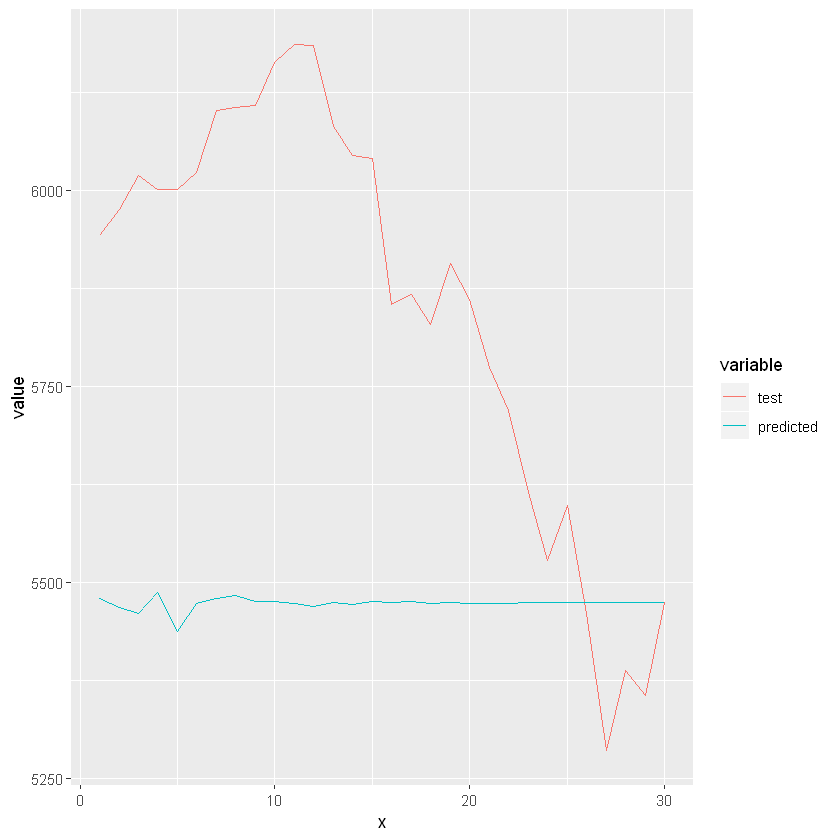

In [17]:

var_pred = predict(var.a, n.ahead = 30)$fcst[1]$DAX[,1]+ 5473.72


data = as.data.frame(test)
data$arima = var_pred

colnames(data) = c("test","predicted")

data$x = 1:30
data.melted <- melt(data, id="x")
require(ggplot2)
qplot(x=x, y=value, color=variable, data=data.melted, geom="line")

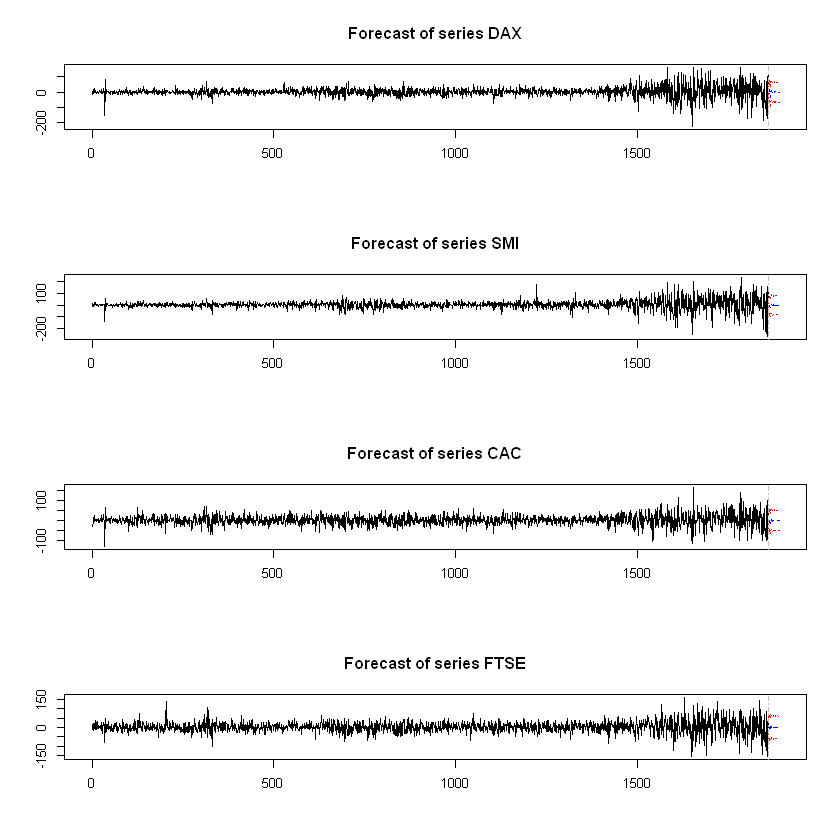

In [18]:
#Forecasting VAR Model
fcast = predict(var.a, n.ahead = 30)
plot(fcast)

In [19]:
#As above forecast does not imply clear  results, lets do some data manipulation
# Forecasting the DAX index

DAX = fcast$fcst[1] # type list

# Extracting the forecast column

x = DAX$DAX[,1]

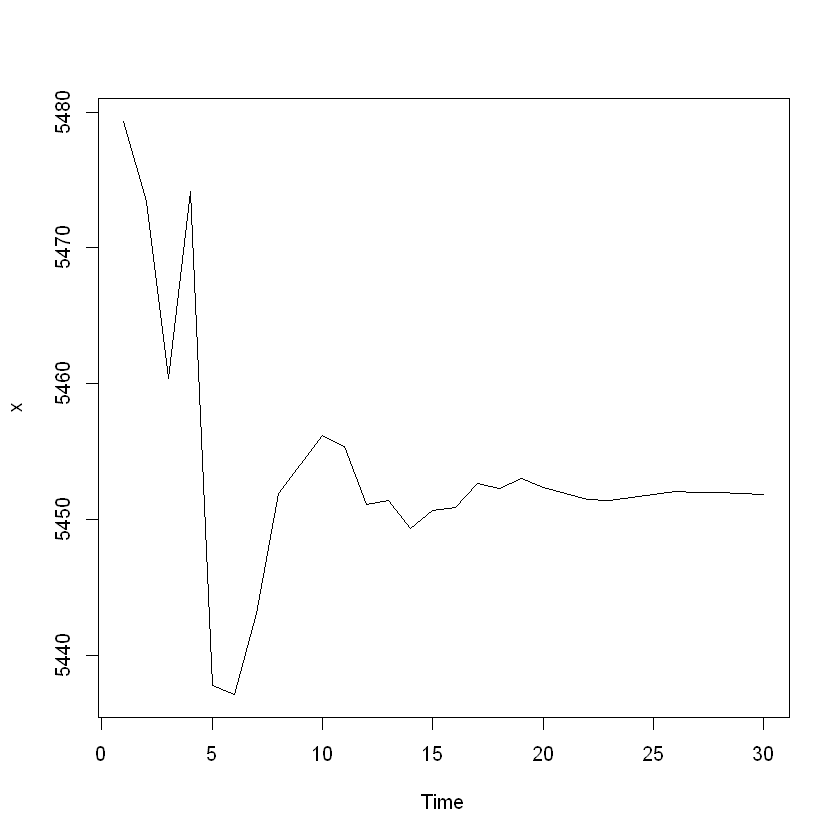

In [20]:
#Getting the data in same scale(as we differenced to make it stationary)
# 5473.72 is the last value, can do tail of the variable and get the data
# Inverting the differencing

x = cumsum(x) + 5473.72
plot.ts(x)



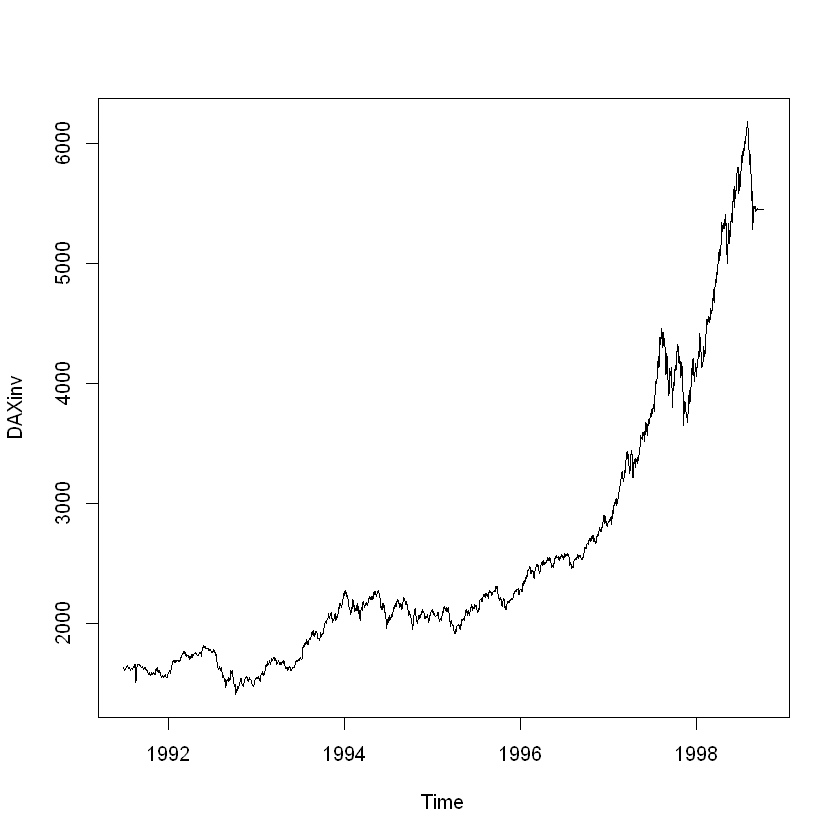

In [21]:
# Adding data and forecast to one time series

DAXinv =ts(c(EuStockMarkets[,1], x),

                 start = c(1991,130), frequency = 260)



plot(DAXinv)

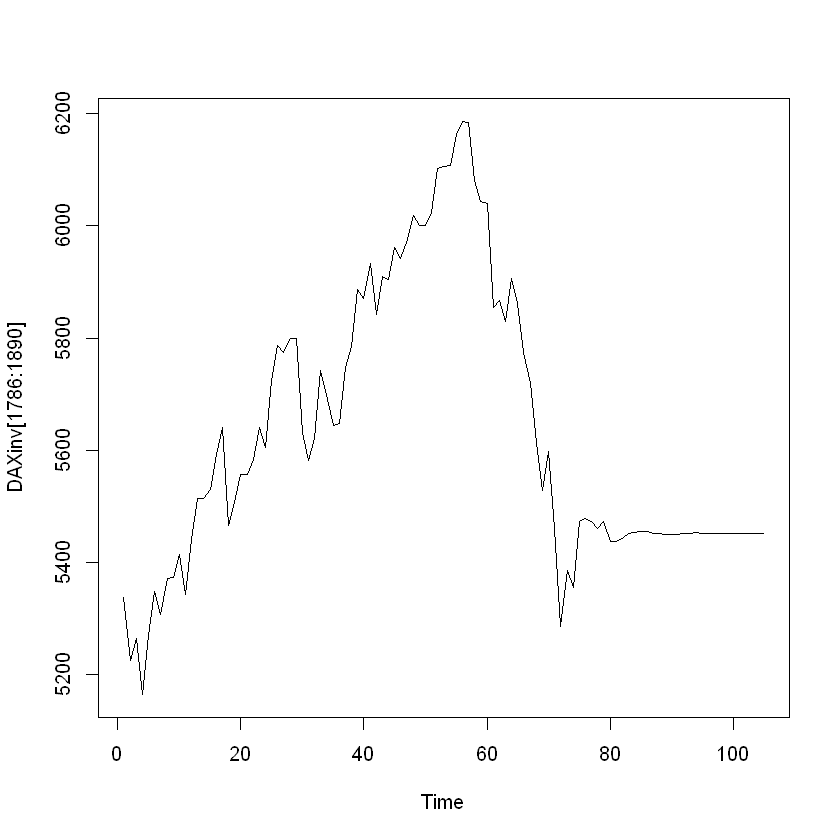

In [22]:
#Let us plot lesser records to get clear plot
plot.ts(DAXinv[1786:1890])


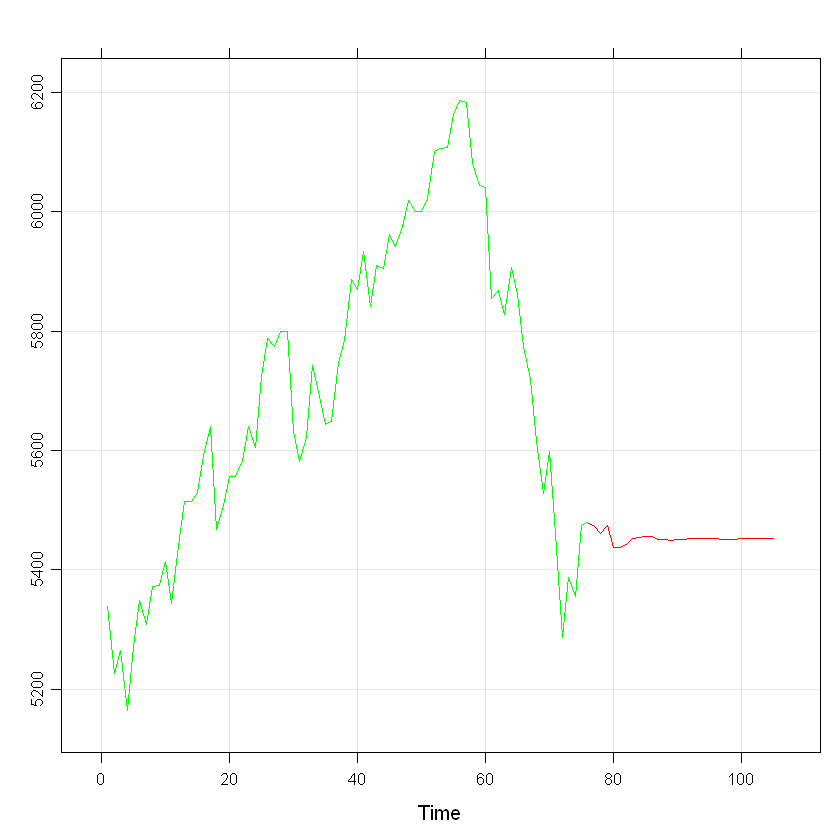

In [23]:
## Creating an advanced plot with visual separation

# Converting to object zoo

x = zoo(DAXinv[1786:1890])

# Advanced xyplot from lattice

xyplot(x, grid=TRUE, panel = function(x, y, ...){

  panel.xyplot(x, y, col="red", ...)

  grid.clip(x = unit(76, "native"), just=c("right"))

  panel.xyplot(x, y, col="green", ...) })



In [24]:
accuracy(var.a$varresult[[1]])

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,1.9807,31.77595,20.41326,NaN,Inf,1.007115


In [30]:
predicted_values = predict(var.a, n.ahead = 30)$fcst[1]$DAX[,1]+ 5473.72

library(Metrics)
print(paste0("RMSE: ", rmse(test, predicted_values)))
print(paste0("MAPE: ", mape(test, predicted_values)))

[1] "RMSE: 460.396230470485"
[1] "MAPE: 0.067504387347946"


# Final Comparison

### Based on the above models

MAPE values for various models on test data set are as follows:

ARIMA:0.072

HOLT WINTERS:0.039

VAR:0.067

NEURAL NETWORK:0.058

As above results indicate that HOLT WINTERS has lesser MAPE hence recommended model for this Problem statement 